In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models,transforms

from utils import mask_circuit, device, sorted_df_list, sorted_df_dict, tensor_to_img, imgs_df
from class_info import *

In [2]:
class_transform = transforms.Compose([
            transforms.Resize(size=(128, 128)),
            transforms.ToTensor(),  # Convert to PyTorch Tensor
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

segment_transform = transforms.Compose([
            transforms.Resize(size=(256, 256)),
            transforms.ToTensor(),  # Convert to PyTorch Tensor
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

In [30]:
class FinalProject():
    classification_model = 'full_model_densenet.pth'
    segmentation_model = 'full_unet.pth'
    threshold = 0.5
    
    def __init__(self, img, class_transform, segment_transform, return_transform=False):
        self.img = img
        self.class_transform = class_transform
        self.segment_transform = segment_transform
        self.return_transform = return_transform

    def analiz(self):
        class_mod = torch.load(self.classification_model, weights_only=False)
        seq_model = torch.load(self.segmentation_model, weights_only=False)

        img_class = self.class_transform(self.img).cuda()
        class_mod.eval()
        with torch.no_grad():
            class_out = class_mod(img_class.unsqueeze(0))
            img_pred = class_out.max(1, keepdim=True)[1].item()

        img_seg = self.segment_transform(self.img).cuda()
        seq_model.eval()
        with torch.no_grad():
            seq_out = seq_model(img_seg.unsqueeze(0))
            seq_pred = (seq_out > self.threshold).float()

        print(info_list[img_pred])
        if self.return_transform:
            return mask_circuit(transforms.Resize(size=(self.img.size[::-1]))(img_seg), transforms.Resize(size=(self.img.size[::-1]))(seq_pred), True, True) # возвращаем размерность к исходной
        else:
            return mask_circuit(img_seg, seq_pred, True, True) # не возвращаем размерность к исходной

Melanoma


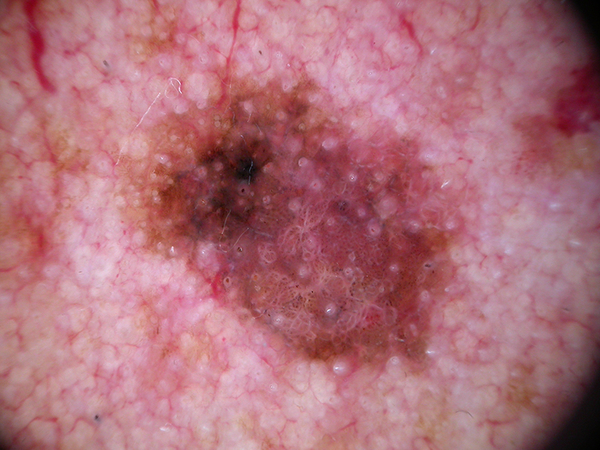

In [102]:
# вбираем рандомное изображение
random_img = np.random.randint(len(imgs_df))
imgs_df['image_id'][random_img]
directory = 'C:/Users/Igor/Desktop/Project_DS50/data/imgs/' + imgs_df['image_id'][random_img] + '.jpg'
img = Image.open(directory).convert("RGB")
print(imgs_df['full_cell_type_name'][random_img])
img


Melanoma (Меланома) — это один из самых агрессивных и опасных типов рака кожи, который развивается из меланоцитов — клеток, вырабатывающих пигмент меланин. Меланома может быстро метастазировать (распространяться на другие органы), поэтому ранняя диагностика и лечение крайне важны.

Характеристики:
    • Внешний вид: Асимметричная родинка или пятно с неровными краями.
    • Цвет: Может быть черным, коричневым, красным, синим или белым.
    • Размер: Обычно больше 6 мм в диаметре, но может быть и меньше.
    • Локализация: Любые участки кожи, включая те, которые не подвержены солнечному воздействию (например, подошвы ног, ладони, ногтевые ложа).

Риск:
    • Ультрафиолетовое (УФ) излучение: Солнечные лучи и солярии являются основными факторами риска.
    • Генетическая предрасположенность: Наличие меланомы у близких родственников увеличивает риск.
    • Светлая кожа: Люди с светлой кожей, светлыми волосами и голубыми глазами более подвержены меланоме.
    • Большое количество родинок: Н

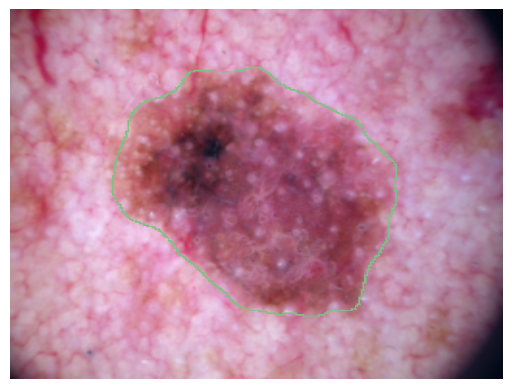

In [103]:
try_1 = FinalProject(img, class_transform, segment_transform, True)
try_1.analiz()